In [2]:
#______________VECTORES Y DATAFRAMES_______________________
import numpy as np #<------------------------------------------Vectores y operaciones: 
import pandas as pd #<-----------------------------------------DataFrame y Series: 
import matplotlib.pyplot as plt #<-----------------------------Graficos?:
#______________SEABORN_______________________
import seaborn as sns #<---------------------------------------Graficos sns(boxplot): 
import seaborn.objects as so #<--------------------------------Graficos so:
#______________SKLEARN_______________________
from sklearn import linear_model #<----------------------------Regresion Lineal: 
from sklearn.metrics import mean_squared_error, r2_score #<----Calidad de Ajuste
from sklearn.preprocessing import PolynomialFeatures  #<-------Regresion Polinomial:
from sklearn.model_selection import train_test_split #<--------Modelo de entrenamiento: 
from formulaic import model_matrix #<--------------------------Modelo Lineal Multivariado
from sklearn.model_selection import KFold, cross_val_score #<--Validacion Cruzada
from sklearn.neighbors import NearestNeighbors #<--------------Metodo de Knn(vecinos mas cercanos)
#______________ECUACION LINEAL_______________________
import scipy #<------------------------------------------------Ecuaciones Lineales(filas>columnas)
from scipy.stats import ttest_ind
#______________SKLEARN-Escalar_______________________
from sklearn.preprocessing import MinMaxScaler #<--------------Escalar a [0,1] 
#_______________________SKLEARN-clustering_______________________
from sklearn.datasets import make_blobs #<---------------------genera datos aleatorios en nubes
from sklearn.cluster import KMeans #<--------------------------Metodo de K-means
from sklearn.cluster import DBSCAN #<--------------------------Metodo de DBSCAN (Densidad)
from sklearn.neighbors import KNeighborsClassifier #<----------Knn ¿categoria segun vecinos?
from sklearn.metrics import confusion_matrix #<----------------Matriz de falsos/verdaderos postivos y negativos
from sklearn.metrics import accuracy_score #<------------------Calcula la precision 
#_______________________SKLEARN-PCA_______________________
from sklearn.preprocessing import StandardScaler #<------------Centra el grafico a la media(media 0)
from sklearn.decomposition import PCA #<-----------------------Reductor de Dimensiones(↑Varianza)
#_______________________SKLEARN- ↓▽f(x)_______________________

import sympy as sym #<-----------------------------------------matemáticas simbólicas (lo uso para derivar)

#Generadores de Datos
from sklearn.datasets import make_blobs #<---------------------genera datos aleatorios en nubes
from sklearn.datasets import make_circles #<-------------------genera datos aleatorios en circunferencias
from sklearn.preprocessing import StandardScaler,OneHotEncoder #<-- Escala datos / transforma variables categoricas 
#_______________________Redes NEURONALES_______________________
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam




c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


# Preprocesamiento
<hr/>

In [4]:
#Cargo el dataframe usando pandas:
df= pd.read_csv("FBRef2020-21.csv")
df.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,1777,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,2889,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,1260,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,1222,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,2813,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70


In [6]:
#____________ 2) ____________
#Elimino los jugadores que jugaron menos de 500 minutos en la temporada(no son relevantes)
df_clean = df.query('Min > 500')

In [7]:
#____________ 3) ____________
#chequeo la cantidad de datos faltantes por cada columna:
df_clean.isnull().sum().unique()

array([  0,   2, 140, 297, 142,  56,  17,   3, 117])

In [8]:
# Calculo el numero de valores nulos por columna
null_counts = df_clean.isnull().sum()

# Creo un DataFrame con los resultados y luego filtro con el metodo .query()
null_counts_df = pd.DataFrame(null_counts, columns=['Missing Values'])
null_counts_df['Column Name'] = null_counts_df.index
null_counts_df.query("`Missing Values` > 100")


,Missing Values,Column Name
SoT%,140,SoT%
Gls/Shot,140,Gls/Shot
Gls/SoT,297,Gls/SoT
AvgShotDist,142,AvgShotDist
npxG/Shot,142,npxG/Shot
DribSucc%,117,DribSucc%


In [9]:
#Creo una serie:
datos_faltantes = df_clean.isnull().sum()

#Elimino las columnas con mas de 100 datos faltantes:
columnas_mayor_a_100 = datos_faltantes[datos_faltantes>100].index
df_clean = df_clean.drop(columns = columnas_mayor_a_100 )

#Verifico como quedo
df_clean.isnull().sum().unique()

array([ 0,  2, 56, 17,  3])

In [10]:
#chequeo la cantidad de datos faltantes por cada fila:
df_clean.isnull().sum(axis = 1).unique()

array([ 0,  1, 98,  2])

In [11]:
# Dado que hay 3 filas con valores nulos vamos a dropearlas
filas_con_nulos = df_clean.isnull().sum(axis = 1)
filas_con_nulos = filas_con_nulos[filas_con_nulos >= 1].index
df_clean = df_clean.drop(filas_con_nulos )

In [12]:
## Al finalizar la limpieza de datos, reseteo los indices.
df_clean = df_clean.reset_index(drop=True)

In [13]:
#Me quedo solo con los valores numericos:
df_only_number = df_clean.select_dtypes(include='number')

#Tomo a apartir de 'Ast/90' en adelante:
data_num = df_only_number[df_only_number.columns[6:]]
data_num.columns

Index(['Ast/90', 'npG/90', 'npG+A/90', 'xA/90', 'npxG/90', 'npxG+xA/90',
       'Shots/90', 'SoTs/90', 'FKSht/90', 'np:G-xG',
       ...
       'PrgDistCarry/90', 'ProgCarry/90', 'CarryIntoThird/90',
       'CarryIntoBox/90', 'Miscontrol/90', 'Dispossessed/90', 'PassTarget/90',
       'PassesReceived/90', 'PassRec%', 'ProgPassReceived/90'],
      dtype='object', length=106)

# Clustering
<hr/>

## El objetivo es realizar algun agrupamiento de jugadores con caracteristicas similares.

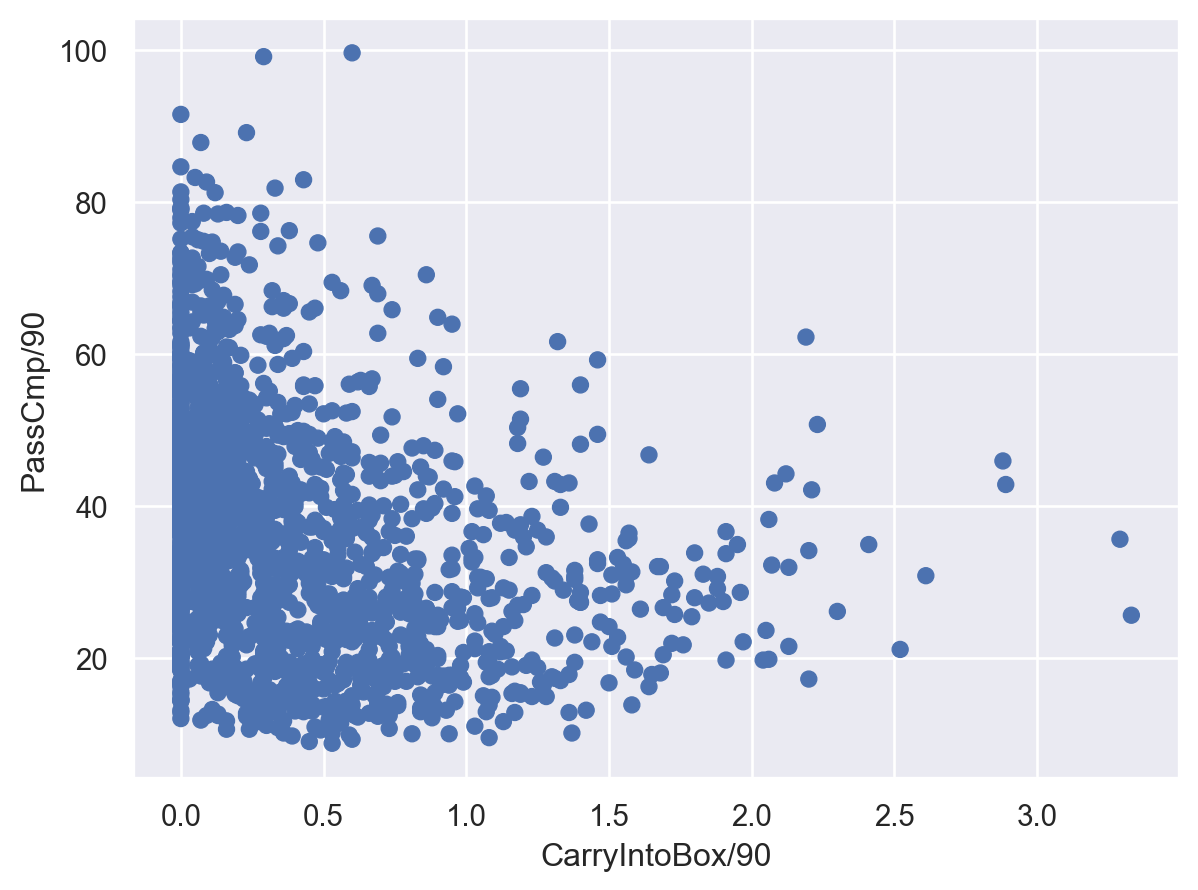

In [14]:
#_______________ a) _______________
# Elijo 2 columnas cualesquiera:
np.random.seed(0)
columnas_aleatorias = np.random.choice(data_num.columns, size=2, replace=False, )
df_aleatorio = data_num[columnas_aleatorias]

#Grafico:
display(
    so.Plot(df_aleatorio,columnas_aleatorias[0],columnas_aleatorias[1])
    .add(so.Dot())
)

In [15]:
columnas_aleatorias

array(['CarryIntoBox/90', 'PassCmp/90'], dtype=object)

> Observando el grafico de dispersion, no se puede apreciar grupos distintos

### Escalo los datos y realizo un analisis de componentes principales, me quedo solo con las dos primeras componentes. 

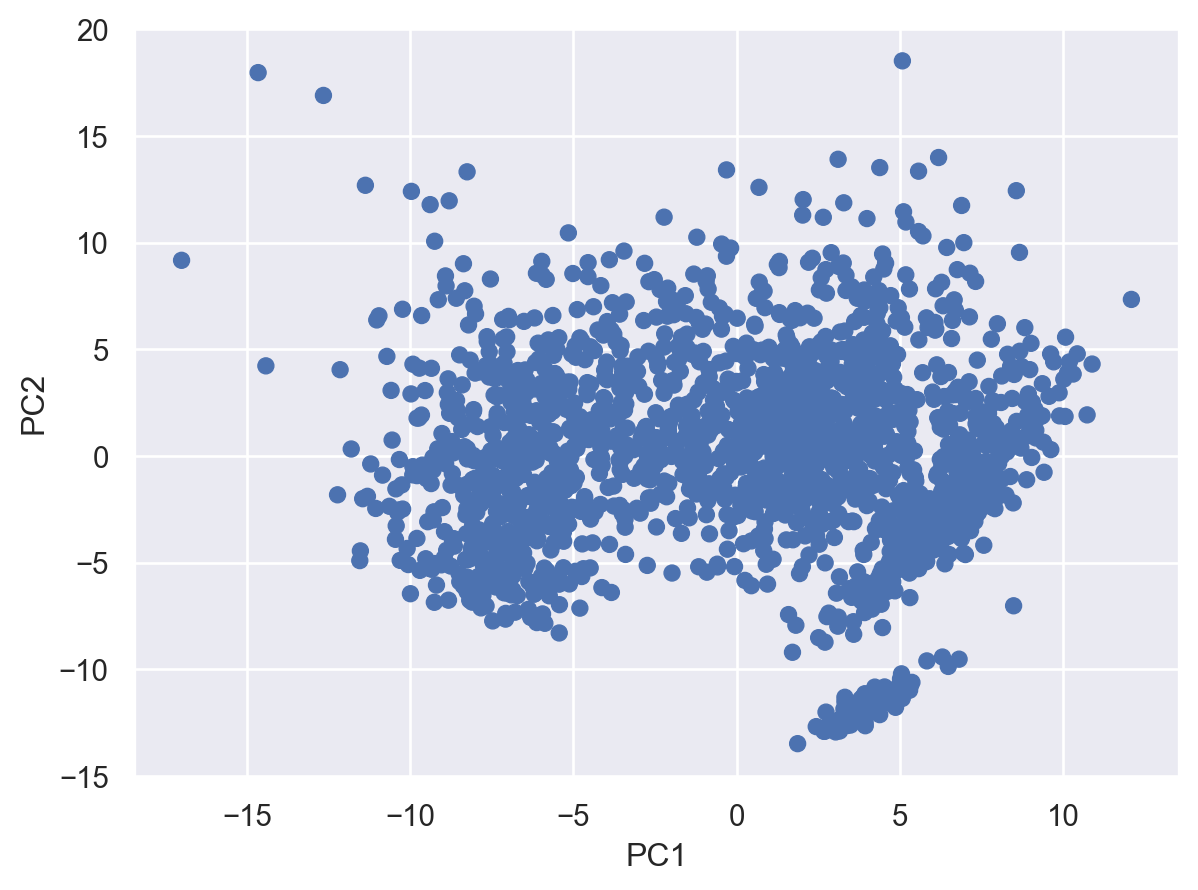

In [16]:
#_______________ b) _______________

#______ ESCALADO ______
#Escalo los datos a media 0 y std 1
data_num_escalado = StandardScaler().set_output(transform="pandas").fit_transform(data_num)

#______ EIGEN VAL/VEC ______
#Calculo eigen valores/Vectores a travez de la matriz de covarianza:
valores, vectores = np.linalg.eigh(data_num_escalado.cov())
#eigh es creciente, asi que volteo los vectores:
valores = np.flip(valores)
vectores = np.flip(vectores,axis=1)

#______ PC ______
#Calculo las 2 componentes principales:
pca_df = data_num_escalado @ vectores[:,0:2]
pca_df.columns = ["PC1","PC2"]
# Elimino datos faltantes y reseteamos los índices, para no tener problemas al graficar
pca_df = pca_df.dropna().reset_index(drop=True)
#______ GRAFICO ______
(
    so.Plot(pca_df,"PC1","PC2")
    .add(so.Dot())
)


> analizando el grafico, se pueden distinguir 4 clusters a ojo

##### Estas lineas de codigo son unicamente para mostrar los 4 clusters que se observan en el grafico anterior

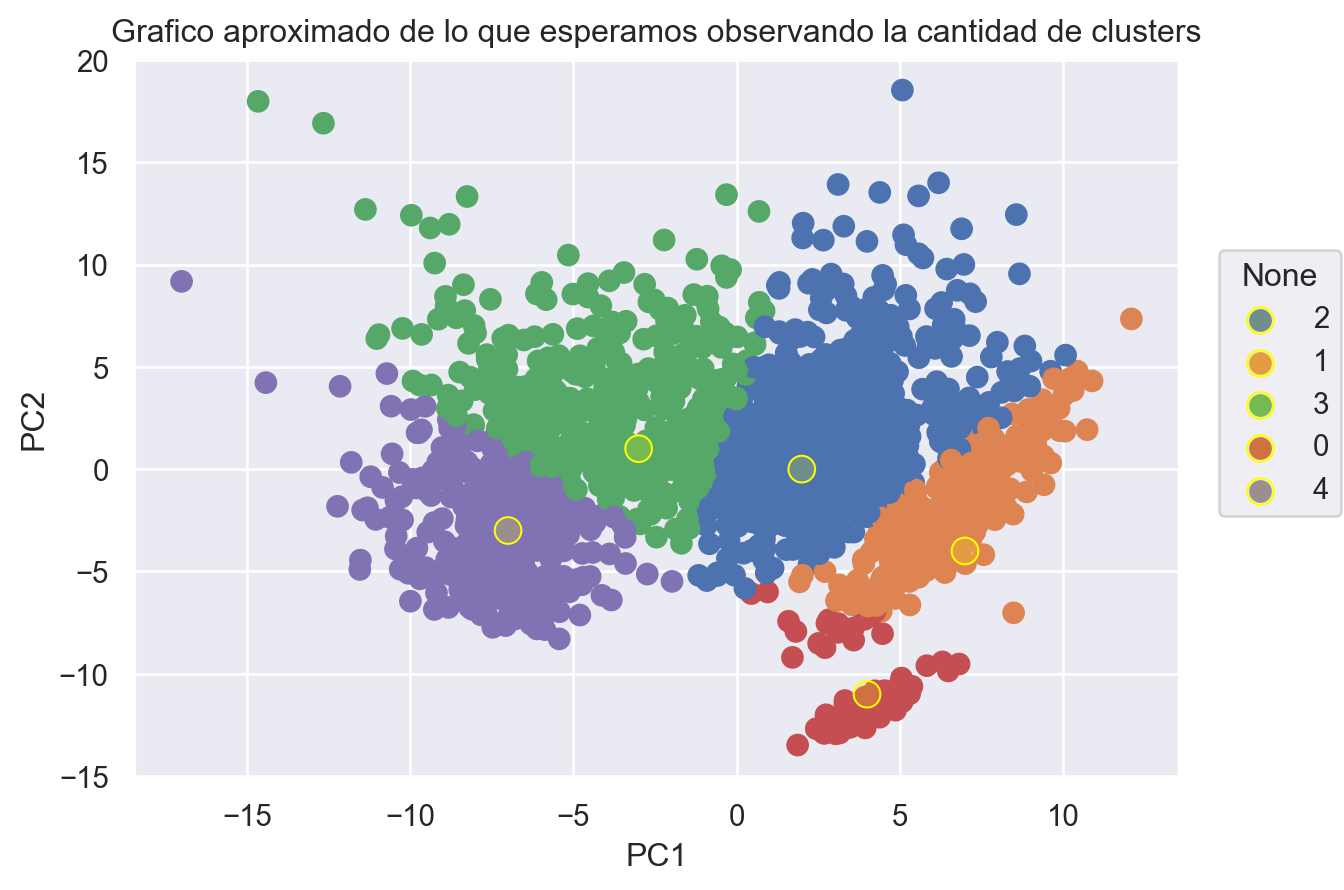

In [14]:
# Fijamos centros para los clusters arbitrariamente
centros = np.array([[4, -11], [7, -4], [2,0], [-3,1],[-7,-3]])



def distancias_a_centros(pca_df, centros):
    k = len(centros)
    nDatos = len(pca_df)
    distMatrix = np.zeros((nDatos, k))
    for i, centro in enumerate(centros):
        dist = np.linalg.norm(pca_df - centro, axis = 1)
        distMatrix[:,i] = dist
    return(distMatrix)

# Item 3
def calcular_etiquetas(pca_df, centros):
    distMatrix = distancias_a_centros(pca_df, centros)
    etiquetas = np.argmin(distMatrix, axis = 1)   # Array de enteros. Al aplicar np.argmin a lo largo de las filas, obtenemos un arreglo donde cada elemento es el índice del centro más cercano para cada punto de datos.
    return(pd.Series(etiquetas.astype("str")))  # Convertimos los enteros a strings

# Item 4
etiquetas = calcular_etiquetas(pca_df, centros)

# Graficamos
(
    so.Plot(x = pca_df.iloc[:, 0], y =  pca_df.iloc[:, 1], color = etiquetas).label(title="Grafico aproximado de lo que esperamos observando la cantidad de clusters")
    .add(so.Dot(pointsize = 8))
    .add(so.Dots(color = "yellow", pointsize= 10), x = centros[:,0], y = centros[:,1])
)

Dado que originalmente estaba comparando los goles esperados + asistencias de los jugadores en 90 min vs los carries progresivos (llevar la pelota al área de penal) en 90 min. 
Los clusteres pueden corresponder a:
- La posicion original del jugador (Ejemplo: un defensor central o arquero tendran bajo rendimiento en cuanto a (npG+A)/90min y tendencia a ser carries)
- La tendencia del jugador a rematar al arco (esto lo podemos estimar segun la columna de Goles) --> Originalmente esto se estimaria con Goles esperados, pero debido a que estamos utilizando esa columna, en su lugar usaremos la columna goles para conjeturar.
- La tendencia del jugador a asistir (esto lo podemos estimar segun la columna de Asistencias Esperadas)

### Analizo el agrupamiento usando K-Means

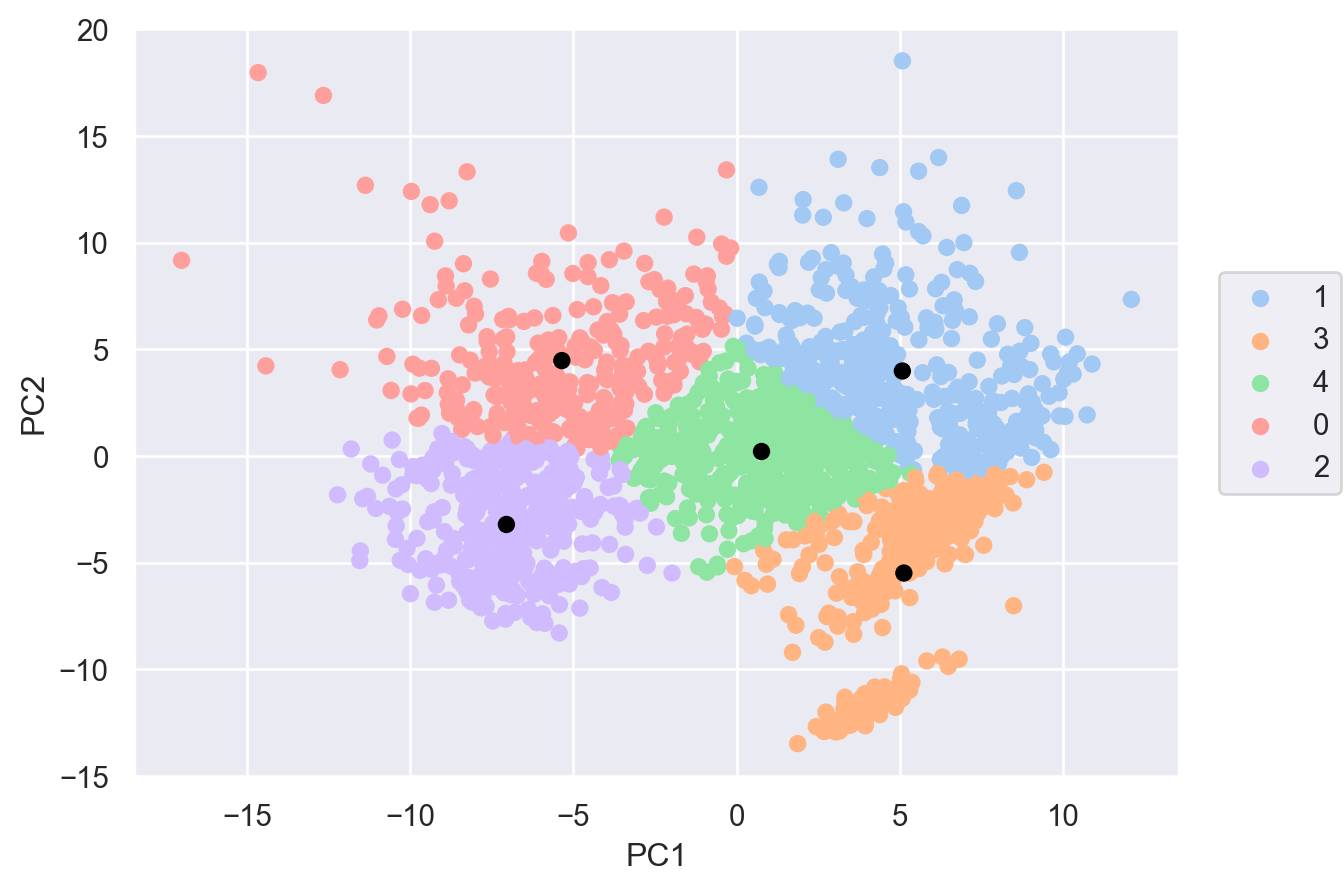

In [15]:

kmedias = KMeans(n_clusters=5,n_init="auto")
etiqueta_kmedias =  kmedias.fit_predict(pca_df)
centros_kmedias = kmedias.cluster_centers_
#______ GRAFICO ______
(
    so.Plot()
    .add(so.Dot(),data =pca_df,x="PC1",y="PC2",color=etiqueta_kmedias.astype(str))
    .add(so.Dot(color="black"),x=centros_kmedias[:,0],y=centros_kmedias[:,1])
    .scale(color="pastel")
)

> Si bien el grafico que obtengo utilizando K-means no es exactamente igual al grafico que intuia, hay pequeñas diferencias debido a le eleccion de los centroides.

### Analizo el agrupamiento con DBSCAN

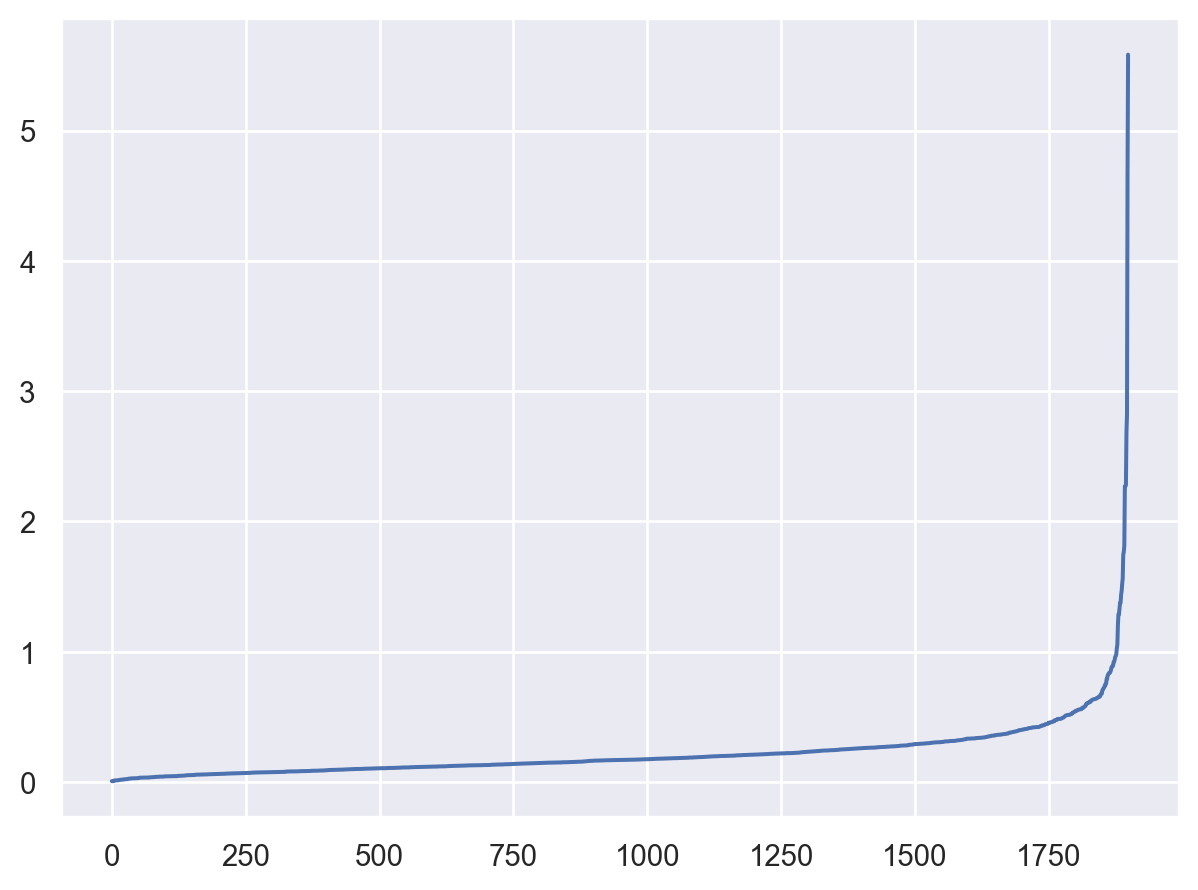

In [ ]:
neighbors = NearestNeighbors(n_neighbors=2)  # Esta función  devuelve los más cercanos incluyendo a si mismo, por eso uso 2.
neighbors_fit = neighbors.fit(pca_df)

# Ordenamos de menor a mayor las distancias y graficamos
distances, indices = neighbors_fit.kneighbors(pca_df)
distances = distances[:,1]
distances = np.sort(distances, axis=0)

so.Plot(x = np.arange(len(distances)), y = distances).add(so.Line())

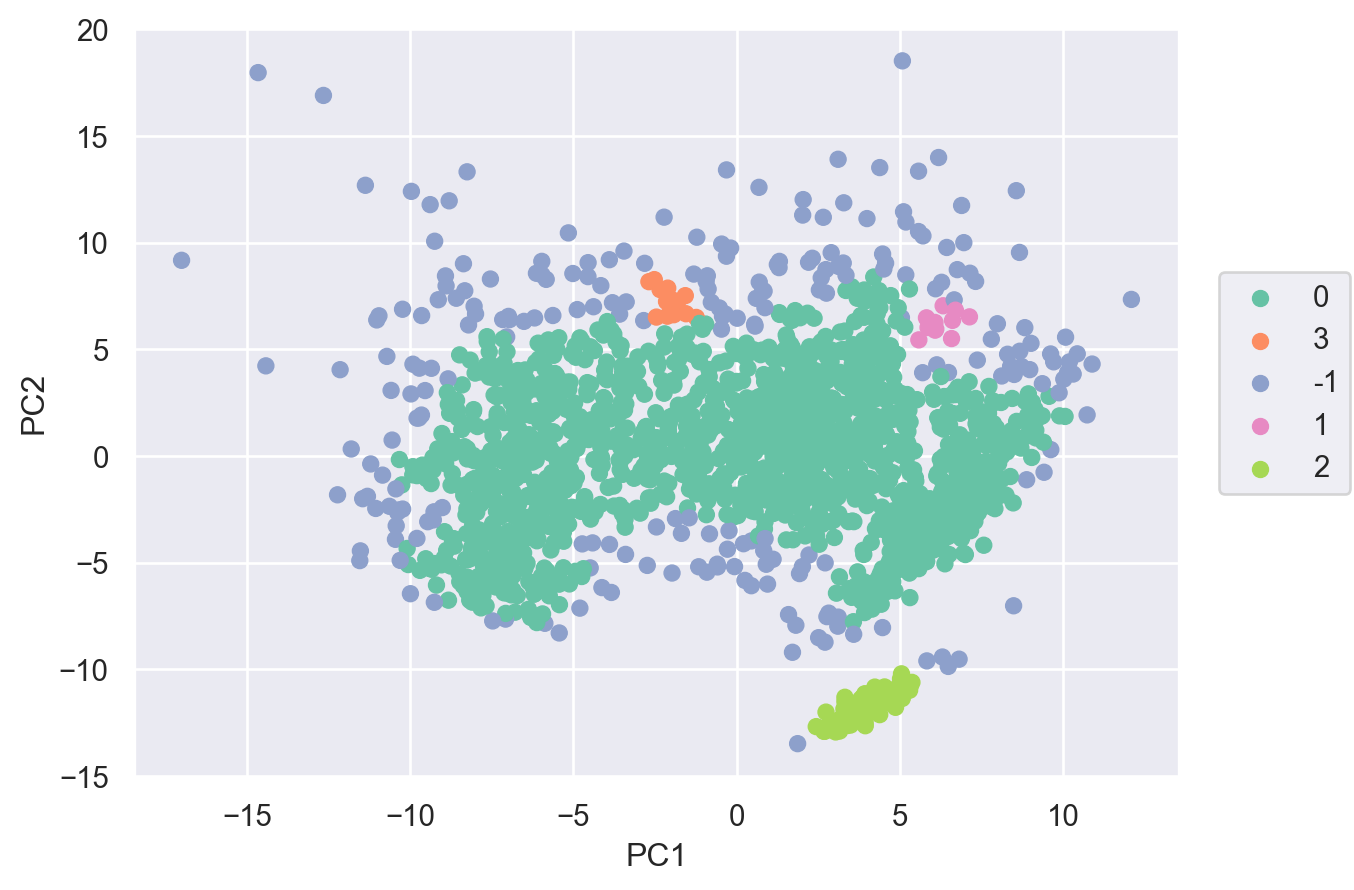

In [ ]:
# Elegi el eps donde la curva hace un codo.
# De esta forma tengo un valor pequeño que incluye a la mayoria de los datos.
# Tomo eps = 0.75.
etiqueta_dbscan = DBSCAN(eps=0.75,min_samples=8).fit_predict(pca_df)

#______ GRAFICO ______
(
    so.Plot()
    .add(so.Dot(),data =pca_df,x="PC1",y="PC2",color=etiqueta_dbscan.astype(str))
    .scale(color="Set2")
)

# Clasificación 
<hr/>

## 7. Ahora quiero poder predecir la posicion en la que juega cada jugador segun sus datos estadisticos utilizando KNN.
- Para simplificar el analisis voy a considerar una unica posicion por jugador.

In [17]:

# vuelvo a hacer uso de df_clean
display(df_clean.Pos.unique())

#Como hay algunos jugadores que tienen 2 posiciones me quedo solo con la primera:

Pos_filt= pd.Series([col[:2] for col in df_clean.Pos])

# vuelvo a hacer uso de df_clean
display(Pos_filt.unique())

array(['DF', 'DF,FW', 'DF,MF', 'FW', 'FW,DF', 'FW,MF', 'GK', 'MF',
       'MF,DF', 'MF,FW'], dtype=object)

array(['DF', 'FW', 'GK', 'MF'], dtype=object)

### Divido el DataFrame data_num y la Series Pos_filt utilizando un 80% para entrenamiento y un 20% para testeo.

In [18]:

#Divido el df_num y Pos_filt en train y test (X:datos, y:etiqueta):
X_train,X_test,y_train,y_test = train_test_split(data_num,Pos_filt,test_size=0.2,random_state=1)

# NOTA: escalo X_train y X_test debido  que KNN es sensible a las escalas
# NOTA2: No utilizo MinMaxScaler debido a que es sensible a valores atipicos
scaled = StandardScaler().set_output(transform="pandas")
X_train_scaled = scaled.fit_transform(X_train)
X_test_scaled = scaled.transform(X_test)


### Aplico un esquema de validacion en el conjunto de entrenamiento para seleccionar el valor optimo de K.

In [ ]:

#_____ ALMACENAMIENTO ______
#Voy guardando los errores para graficar luego:
k_valores = range(1, 25)
train_errors = []
test_errors = []

#_____ ITERACION ______
#Voy iterando por la cantidad de vecinos:
for k in k_valores:

    #_____ MODELO______
    #Construyo el modelo
    knn = KNeighborsClassifier(n_neighbors=k)
    #Lo entreno con mis datos train:
    knn.fit(X_train_scaled , y_train)

    #_____ PREDICCION ______
    # Predecir en el conjunto de entrenamiento y prueba
    y_train_pred = knn.predict(X_train_scaled )
    y_test_pred = knn.predict(X_test_scaled)

    #_____ CALIDAD ______
    # Calculo el error (1 - accuracy)
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)

    # Almaceno los errores
    train_errors.append(train_error)
    test_errors.append(test_error)


In [20]:
#Busco el valor mínimo y su índice en test_errors
min_error = min(test_errors)
min_index = test_errors.index(min_error)
k_optimo = k_valores[min_index]
print("El menor error de predicción ocurre en " + str(k_optimo) + " vecinos")


El menor error de predicción ocurre en 9 vecinos


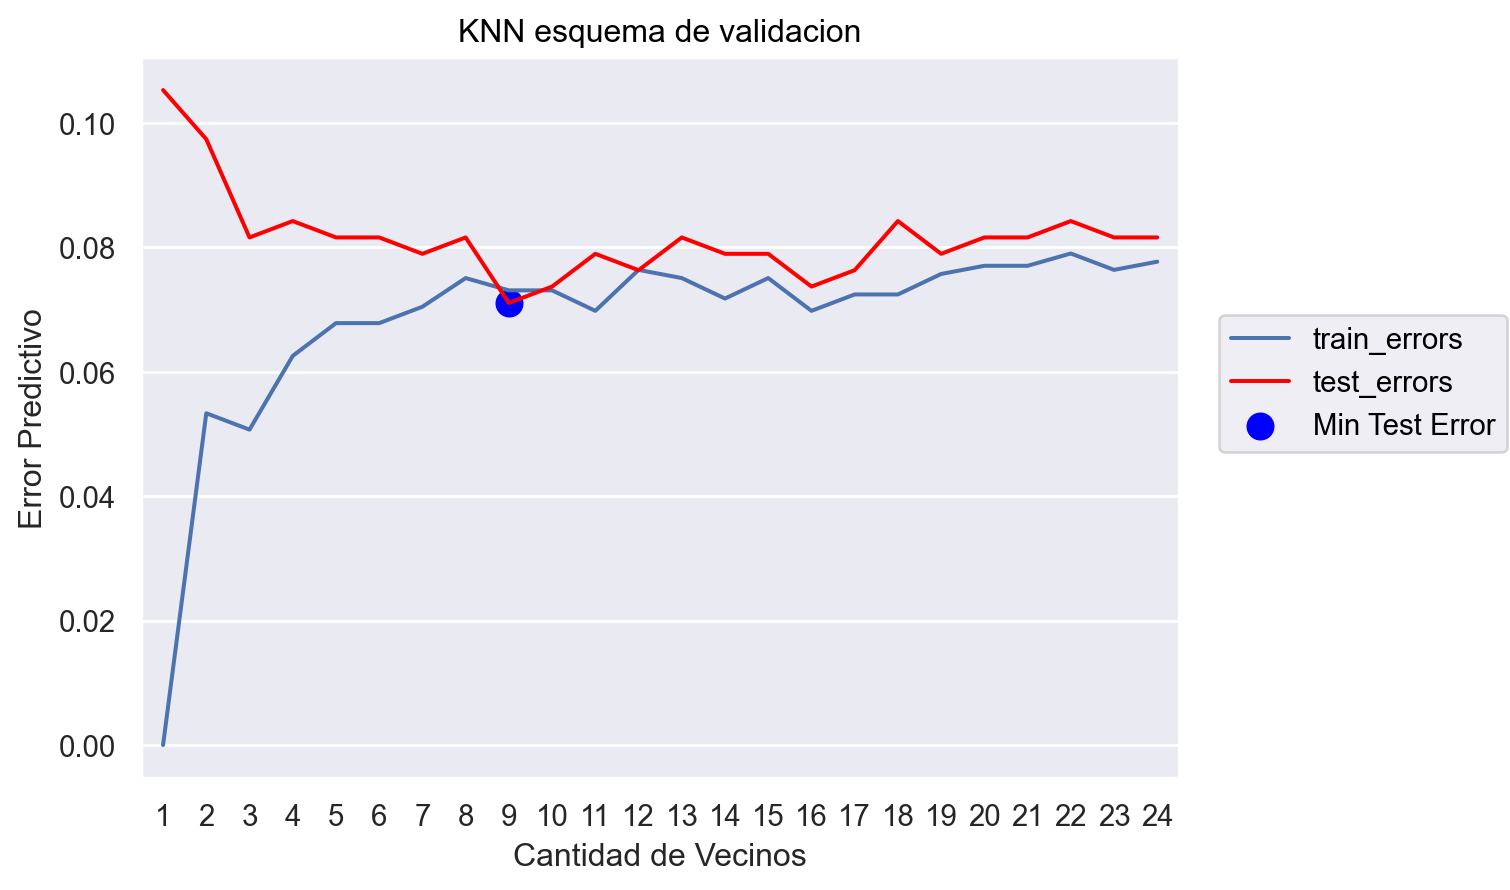

In [21]:
#________ GRAFICO ________
(
    so.Plot()
    .add(so.Line(), x=k_valores, y=train_errors, label="train_errors")
    .add(so.Line(color="red"), x=k_valores, y=test_errors, label="test_errors")
    .add(so.Dot(color="blue", pointsize=10), x=[k_optimo], y=[min_error], label="Min Test Error")  # Añado el punto mínimo
    .label(title="KNN esquema de validacion", x="Cantidad de Vecinos", y="Error Predictivo")
    .scale(x=so.Nominal())
)

Se puede ver que es mejor hacer uso de 9 vecinos, debido a que obtenemos el pico mas bajo en el error de prediccion.

In [ ]:
# Entreno el modelo KNN con el valor óptimo de K
knn_optimo= KNeighborsClassifier(n_neighbors=k_optimo)
knn_optimo.fit(X_train_scaled , y_train)

# Hago predicciones en el conjunto de testeo
y_pred = knn_optimo.predict(X_test_scaled)

# Calculo el porcentaje de aciertos
accuracy = accuracy_score(y_test, y_pred) * 100

print(f"Para el valor de K = {k_optimo}, el porcentaje de aciertos en el conjunto de testeo es: {accuracy:.2f}%")


Para el valor de K = 9, el porcentaje de aciertos en el conjunto de testeo es: 92.89%


### Repito el procedimiento utilizando la primeras dos componentes principales en vez de todas las variables y me fijo si mejora el modelo

In [25]:
#Divido el df_num y Pos_filt en train y test (X:datos, y:etiqueta) utilizando PCA:
X_train,X_test,y_train,y_test = train_test_split(pca_df,Pos_filt,test_size=0.2,random_state=1)

In [23]:
## Es lo mismo que esta arriba
#_____ ALMACENAMIENTO ______
#Voy guardando los errores para graficar luego:
k_valores = range(1, 20)
train_errors = []
test_errors = []

#_____ ITERACION ______
#Voy iterando por la cantidad de vecinos:
for k in k_valores:

    #_____ MODELO______
    #Construyo el modelo
    knn = KNeighborsClassifier(n_neighbors=k)
    #Lo entreno con mis datos train:
    knn.fit(X_train, y_train)

    #_____ PREDICCION ______
    # Predecir en el conjunto de entrenamiento y prueba
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    #_____ CALIDAD ______
    # Calcular el error (1 - accuracy)
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)

    # Almacenar los errores
    train_errors.append(train_error)
    test_errors.append(test_error)
#Busco el valor mínimo y su índice en test_errors
min_error = min(test_errors)
min_index = test_errors.index(min_error)
k_optimo = k_valores[min_index]
print("El menor error de predicción ocurre en " + str(k_optimo) + " vecinos")


El menor error de predicción ocurre en 10 vecinos


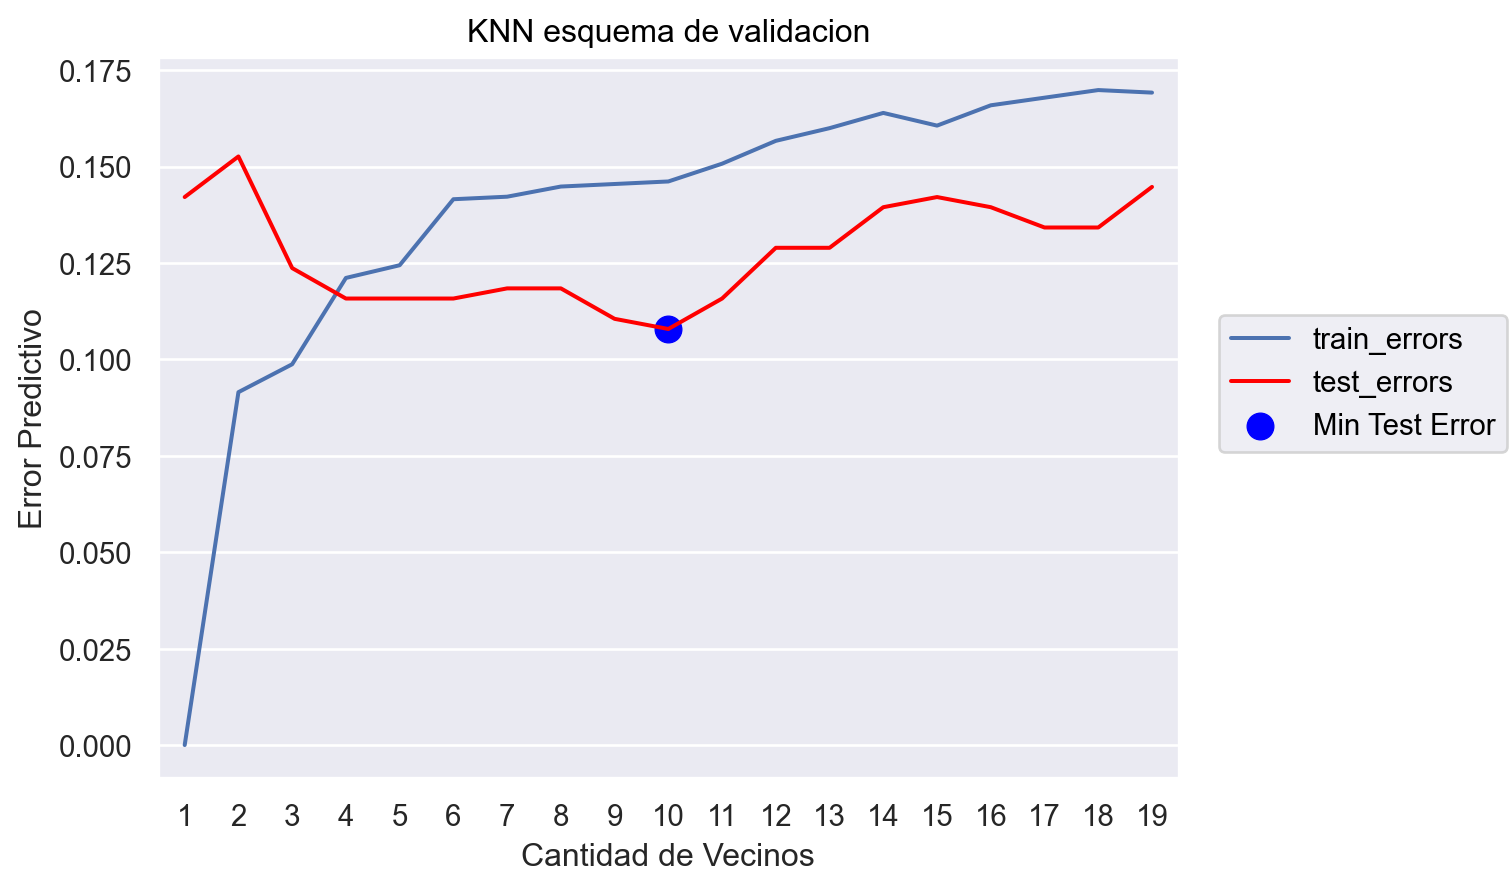

In [24]:
#________ GRAFICO ________           #Nota Nahue: Me parecio interesante volverlo a graficar para ver como variable el error predicto luego de realizar PCA
(
    so.Plot()
    .add(so.Line(), x=k_valores, y=train_errors, label="train_errors")
    .add(so.Line(color="red"), x=k_valores, y=test_errors, label="test_errors")
    .add(so.Dot(color="blue", pointsize=10), x=[k_optimo], y=[min_error], label="Min Test Error")  # Añado el punto mínimo
    .label(title="KNN esquema de validacion", x="Cantidad de Vecinos", y="Error Predictivo")
    .scale(x=so.Nominal())
)

In [25]:
# Entrenar el modelo KNN con el valor óptimo de K
knn_optimo= KNeighborsClassifier(n_neighbors=k_optimo)
knn_optimo.fit(X_train, y_train)

# Hacer predicciones en el conjunto de testeo
y_pred = knn_optimo.predict(X_test)

# Calcular el porcentaje de aciertos
accuracy = accuracy_score(y_test, y_pred) * 100

print(f"Para el valor de K = {k_optimo}, el porcentaje de aciertos en el conjunto de testeo es: {accuracy:.2f}%")


Para el valor de K = 10, el porcentaje de aciertos en el conjunto de testeo es: 89.21%


> Con PCA empeoro el porcentaje de aciertos!

##  Repito el mismo metodo de clasificacion con el dataset de jugadoras de la liga inglesa femenina superleague2023.csv.

#### 1) Clasificacion sin modificar parametros y realizando directamente KNN

In [26]:
df= pd.read_csv("superleague2023.csv")
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,Per90Minutes_Gls,Per90Minutes_Ast,Per90Minutes_G+A,Per90Minutes_G-PK,Per90Minutes_G+A-PK,Per90Minutes_xG,Per90Minutes_xAG,Per90Minutes_xG+xAG,Per90Minutes_npxG,Per90Minutes_npxG+xAG
0,1,Princess Ademiluyi,eng ENG,"MF,FW",West Ham,17.0,2006.0,11,0,87,...,0.0,1.03,1.03,0.0,1.03,0.03,0.00,0.03,0.03,0.03
1,2,Michelle Agyemang,eng ENG,FW,Arsenal,17.0,2006.0,1,0,6,...,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,3,Alyssa Aherne,eng ENG,MF,Everton,19.0,2004.0,1,0,1,...,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,4,Olga Ahtinen,fi FIN,MF,Tottenham,NaN,NaN,16,10,923,...,0.1,0.20,0.29,0.1,0.29,0.04,0.12,0.15,0.04,0.15
4,5,Asmita Ale,eng ENG,DF,Leicester City,21.0,2001.0,6,4,296,...,0.0,0.00,0.00,0.0,0.00,0.06,0.00,0.06,0.06,0.06


In [30]:
# debido a que la columna Min habia valores no numericos, debemos convertirlos a tipo int
df['Min'] = pd.to_numeric(df['Min'], errors='coerce')

In [31]:
#____________ 2) ____________
#Eliminamos los jugadores que jugaron menos de 500 minutos en la temporada
df_clean = df.query('Min > 500')

In [32]:
#Creamos una serie:
datos_faltantes = df_clean.isnull().sum()

#Eliminamos las columnas con mas de 100 datos faltantes:
columnas_mayor_a_100 = datos_faltantes[datos_faltantes>100].index
df_clean = df_clean.drop(columns = columnas_mayor_a_100 )

#Verificamos como quedo
df_clean.isnull().sum().unique()



array([0, 1], dtype=int64)

In [33]:
#chequemos la cantidad de datos faltantes por cada fila:
df_clean.isnull().sum(axis = 1).unique()

array([2, 0, 1], dtype=int64)

In [34]:
# Dado que hay 2 filas con valores nulos vamos a dropearlas
filas_con_nulos = df_clean.isnull().sum(axis = 1)
filas_con_nulos = filas_con_nulos[filas_con_nulos >= 1].index
df_clean = df_clean.drop(filas_con_nulos )
df_clean = df_clean.reset_index(drop=True)


In [35]:
#Tomamos las columnas a apartir de 'MP', inclusive seleccionando unicxamente las variables numericas:
indice_columna_base = df_clean.columns.get_loc('MP')
data_num = df_clean.iloc[:, indice_columna_base:].select_dtypes(include='number')
#Chequeamos que columns nos quedaron
data_num.dropna()
data_num


,MP,Starts,Min,90s,Performance_Gls,Performance_Ast,Performance_G+A,Performance_G-PK,Performance_PK,Performance_PKatt,...,Per90Minutes_Gls,Per90Minutes_Ast,Per90Minutes_G+A,Per90Minutes_G-PK,Per90Minutes_G+A-PK,Per90Minutes_xG,Per90Minutes_xAG,Per90Minutes_xG+xAG,Per90Minutes_npxG,Per90Minutes_npxG+xAG
0,13,8,666.0,7.4,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.18,0.10,0.28,0.18,0.28
1,17,6,689.0,7.7,11,2,13,11,0,0,...,1.44,0.26,1.70,1.44,1.70,0.84,0.15,0.99,0.84,0.99
2,22,9,874.0,9.7,1,0,1,1,0,0,...,0.10,0.00,0.10,0.10,0.10,0.11,0.00,0.12,0.11,0.12
3,9,8,734.0,8.2,1,2,3,1,0,0,...,0.12,0.25,0.37,0.12,0.37,0.04,0.05,0.09,0.04,0.09
4,8,6,559.0,6.2,1,0,1,0,1,1,...,0.16,0.00,0.16,0.00,0.00,0.16,0.03,0.20,0.03,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,21,2,578.0,6.4,5,1,6,5,0,0,...,0.78,0.16,0.93,0.78,0.93,0.64,0.12,0.77,0.64,0.77
75,9,8,644.0,7.2,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.04,0.06,0.09,0.04,0.09
76,7,7,630.0,7.0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
77,9,8,711.0,7.9,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.02,0.01,0.02


In [36]:
#__________ a) __________
#Como hay algunos jugadores que tienen 2 posiciones me quedo solo con la primera:
Pos_filt= pd.Series([col[:2] for col in df_clean.Pos])
display(Pos_filt.unique())

array(['MF', 'FW', 'DF', 'GK'], dtype=object)

In [37]:
#____ b) ____
#Divido el df_num y Pos_filt en train y test (X:datos, y:etiqueta):
X_train,X_test,y_train,y_test = train_test_split(data_num,Pos_filt,test_size=0.2,random_state=1)

# NOTA: escalamos X_train y X_test debido  que KNN es sensible a las escalas
# NOTA2: No utilizamos MinMaxScaler debido a que es sensible a valores atipicos
scaled = StandardScaler().set_output(transform="pandas")
X_train_scaled = scaled.fit_transform(X_train)
X_test_scaled = scaled.transform(X_test)


In [38]:
#__________ c) __________
#_____ ALMACENAMIENTO ______
#Voy guardando los errores para graficar luego:
k_valores = range(1, 25)
train_errors = []
test_errors = []

#_____ ITERACION ______
#Voy iterando por la cantidad de vecinos:
for k in k_valores:

    #_____ MODELO______
    #Construyo el modelo
    knn = KNeighborsClassifier(n_neighbors=k)
    #Lo entreno con mis datos train:
    knn.fit(X_train, y_train)

    #_____ PREDICCION ______
    # Predecir en el conjunto de entrenamiento y prueba
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    #_____ CALIDAD ______
    # Calcular el error (1 - accuracy)
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)

    # Almacenar los errores
    train_errors.append(train_error)
    test_errors.append(test_error)


In [39]:
#Busco el valor mínimo y su índice en test_errors
min_error = min(test_errors)
min_index = test_errors.index(min_error)
k_optimo = k_valores[min_index]
print("El menor error de predicción ocurre en " + str(k_optimo) + " vecinos")


El menor error de predicción ocurre en 2 vecinos


In [40]:
#________ GRAFICO ________
(
    so.Plot()
    .add(so.Line(), x=k_valores, y=train_errors, label="train_errors")
    .add(so.Line(color="red"), x=k_valores, y=test_errors, label="test_errors")
    .add(so.Dot(color="blue", pointsize=10), x=[k_optimo], y=[min_error], label="Min Test Error")  # Añado el punto mínimo
    .label(title="KNN esquema de validacion", x="Cantidad de Vecinos", y="Error Predictivo")
    .scale(x=so.Nominal())
)

ValueError: Could not interpret value `train_errors` for `label`. Value is a string, but `data` was not passed.

In [41]:
# Entrenar el modelo KNN con el valor óptimo de K
knn_optimo= KNeighborsClassifier(n_neighbors=k_optimo)
knn_optimo.fit(X_train, y_train)

# Hacer predicciones en el conjunto de testeo
y_pred = knn_optimo.predict(X_test)

# Calcular el porcentaje de aciertos
accuracy = accuracy_score(y_test, y_pred) * 100

print(f"Para el valor de K = {k_optimo}, el porcentaje de aciertos en el conjunto de testeo es: {accuracy:.2f}%")


Para el valor de K = 2, el porcentaje de aciertos en el conjunto de testeo es: 43.75%


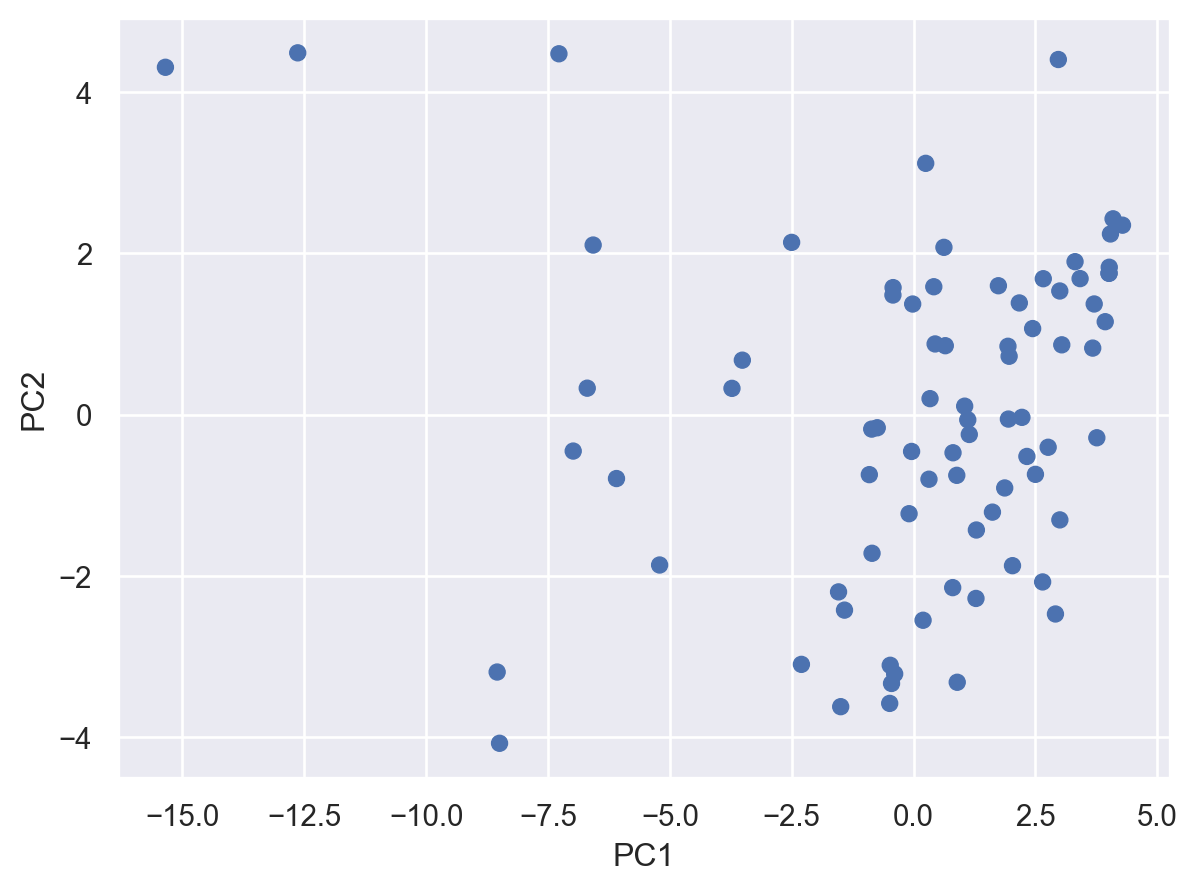

In [42]:
#_______________ b) _______________

#______ ESCALADO ______
#Escalo los datos a media 0 y std 1
data_num_escalado = StandardScaler().set_output(transform="pandas").fit_transform(data_num)

#______ EIGEN VAL/VEC ______
#Calculo eigen valores/Vectores a travez de la matriz de covarianza:
valores, vectores = np.linalg.eigh(data_num_escalado.cov())
#eigh es creciente, asi que volteo los vectores:
valores = np.flip(valores)
vectores = np.flip(vectores,axis=1)

#______ PC ______
#Calculo las 2 componentes principales:
pca_df = data_num_escalado @ vectores[:,0:2]
pca_df.columns = ["PC1","PC2"]
# Eliminamos datos faltantes y reseteamos los índices, para no tener problemas al graficar
pca_df = pca_df.dropna().reset_index(drop=True)
#______ GRAFICO ______
(
    so.Plot(pca_df,"PC1","PC2")
    .add(so.Dot())
)


#### 2) Clasificacion utilizando PCA y luego KNN

In [43]:
#Divido el df_num y Pos_filt en train y test (X:datos, y:etiqueta) utilizando PCA:
X_train,X_test,y_train,y_test = train_test_split(pca_df,Pos_filt,test_size=0.2,random_state=1)

In [44]:
#__________ COPY PASTE DEL PUNTO C) __________
#_____ ALMACENAMIENTO ______
#Voy guardando los errores para graficar luego:
k_valores = range(1, 20)
train_errors = []
test_errors = []

#_____ ITERACION ______
#Voy iterando por la cantidad de vecinos:
for k in k_valores:

    #_____ MODELO______
    #Construyo el modelo
    knn = KNeighborsClassifier(n_neighbors=k)
    #Lo entreno con mis datos train:
    knn.fit(X_train, y_train)

    #_____ PREDICCION ______
    # Predecir en el conjunto de entrenamiento y prueba
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    #_____ CALIDAD ______
    # Calcular el error (1 - accuracy)
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)

    # Almacenar los errores
    train_errors.append(train_error)
    test_errors.append(test_error)
#Busco el valor mínimo y su índice en test_errors
min_error = min(test_errors)
min_index = test_errors.index(min_error)
k_optimo = k_valores[min_index]
print("El menor error de predicción ocurre en " + str(k_optimo) + " vecinos")


El menor error de predicción ocurre en 4 vecinos


In [45]:
#________ GRAFICO ________           #Nota Nahue: Me parecio interesante volverlo a graficar para ver como variable el error predicto luego de realizar PCA
(
    so.Plot()
    .add(so.Line(), x=k_valores, y=train_errors, label="train_errors")
    .add(so.Line(color="red"), x=k_valores, y=test_errors, label="test_errors")
    .add(so.Dot(color="blue", pointsize=10), x=[k_optimo], y=[min_error], label="Min Test Error")  # Añado el punto mínimo
    .label(title="KNN esquema de validacion", x="Cantidad de Vecinos", y="Error Predictivo")
    .scale(x=so.Nominal())
)

ValueError: Could not interpret value `train_errors` for `label`. Value is a string, but `data` was not passed.

In [46]:
# Entrenar el modelo KNN con el valor óptimo de K
knn_optimo= KNeighborsClassifier(n_neighbors=k_optimo)
knn_optimo.fit(X_train, y_train)

# Hacer predicciones en el conjunto de testeo
y_pred = knn_optimo.predict(X_test)

# Calcular el porcentaje de aciertos
accuracy = accuracy_score(y_test, y_pred) * 100

print(f"Para el valor de K = {k_optimo}, el porcentaje de aciertos en el conjunto de testeo es: {accuracy:.2f}%")


Para el valor de K = 4, el porcentaje de aciertos en el conjunto de testeo es: 75.00%


# Recomendaciones de jugadores [2 pts.]
<hr/>

## 9. Trabajamos ahora con el dataset transfermarkt_fbref_201920.csv que incluye la valuacion de los jugadores. Una de las aplicaciones mas comunes de analisis de datos en el futbol es para obtener recomendaciones de jugadores a comprar.

### (a) En 2021 Messi fue transferido del Barcelona al PSG. Basandose en los datos disponibles, recomendarle a Barcelona un jugador de caracteristicas similares a Messi pero de menor valor.

##### Definicion de funciones

> Debido a que tenemos que leer varios archivos y procesar los datos vamos a realizar funciones para que el tp codigo sea legible y reutilizable

In [47]:
def procesarDatos(data):
    #___________Limpieza por Columnas____________________________
    #Creamos una serie:
    # Calculamos los valores faltantes por columna
    datos_faltantes = data.isnull().sum()
    
    # Creamos un DataFrame con los resultados y una columna 'Missing Values'
    datos_faltantes = pd.DataFrame(datos_faltantes, columns=['Missing Values'])
    
    # Calculamos la media de valores faltantes
    mean_datos_faltantes = datos_faltantes['Missing Values'].mean()
    
    # Filtramos las columnas con más valores faltantes que el promedio
    columnas_con_mas_NaN = datos_faltantes[datos_faltantes['Missing Values'] > mean_datos_faltantes].index
    
    # Eliminamos las columnas del dataframe original 'data' y reseteamos el índice
    df_clean = data.drop(columns=columnas_con_mas_NaN).reset_index(drop=True)
    
    # ___________Limpieza por Filas____________________________
    # Eliminamos las filas que tienen valores nulos
    filas_con_nulos = df_clean.isnull().sum(axis=1)
    filas_con_nulos = filas_con_nulos[filas_con_nulos >= 1].index
    df_clean = df_clean.drop(filas_con_nulos)
    return df_clean

In [48]:
def seleccionarDeColumnasDesde(data, columna):
    #Tomamos las columnas a apartir de 'columna', inclusive seleccionando unicxamente las variables numericas:
    indice_columna_base = data.columns.get_loc('columna')
    data_num = df_clean.iloc[:, indice_columna_base:].select_dtypes(include='number')
    return data_num

In [49]:

def top_jugadores_similares(data, jugador_nombre):
    # Eliminamos datos faltantes si es necesario
    data = procesarDatos(data)
    
    # Guardamos las características del jugador
    jugador_row = data.loc[data['player'] == jugador_nombre]

    # Seleccionamos las columnas con las que vamos a trabajar
    columns = ['shots_total', 'shots_on_target', 'goals_per90', 'height', 'assists_per90', 'passes_progressive_distance', 'dribbles_completed_pct', 'xGDiff/90']
    jugador_features = jugador_row[columns].copy()  # Copiamos para evitar la modificación del DataFrame original
    
    # Normalizamos las variables (opcional, depende del modelo y datos)
    scaler = StandardScaler()
    X = data[columns]
    X_scaled = scaler.fit_transform(X)
    jugador_features_scaled = scaler.transform(jugador_features)

    # Creamos un modelo KNN con k=10
    knn_model = NearestNeighbors(n_neighbors=10, algorithm='auto')
    knn_model.fit(X_scaled)

    # Encontramos los jugadores más cercanos al jugador dado
    distances, indices = knn_model.kneighbors(jugador_features_scaled)

    # Obtenemos los jugadores recomendados y sus características
    jugadores_recomendados = data.iloc[indices[0]]

    # Filtramos los jugadores recomendados por aquellos de menor valor que el jugador dado
    jugador_value = jugador_row['value'].values[0]
    jugadores_recomendados_menor_value = jugadores_recomendados[jugadores_recomendados['value'] < jugador_value]

    # Retornamos los nombres de los jugadores recomendados con menor valor que el jugador dado
    return jugadores_recomendados_menor_value['player'].tolist()


Buscaremos a los 10 vecinos mas cercanos a messi en cuanto a caracteristicas, luego filtraremos por valor

##### Procesamiento de datos

In [50]:
# Leemos el archivo csv
data = pd.read_csv("transfermarkt_fbref_201920.csv", delimiter=';')

# Guardamos las características de Messi
messi_row = data.loc[data['player'] == 'Lionel Messi']

# Seleccionamos las columnas con las que vamos a trabajar
columns = ['shots_total', 'shots_on_target', 'goals_per90', 'height', 'assists_per90', 'passes_progressive_distance', 'dribbles_completed_pct', 'xGDiff/90']
messi_features = messi_row[columns]
messi_features

,shots_total,shots_on_target,goals_per90,height,assists_per90,passes_progressive_distance,dribbles_completed_pct,xGDiff/90
257,154,63,0.78,170,0.66,9544,66.8,0.8


In [51]:
# Eliminamos datos faltantes
data = procesarDatos(data)


In [52]:
# NOTA2: No utilizamos MinMaxScaler debido a que es sensible a valores atipicos
# Normalizamos las variables
scaler = StandardScaler()
data[columns] = scaler.fit_transform(data[columns])
messi_features = scaler.transform(messi_features)



# Seleccionar las características numéricas para el modelo KNN
X = data[columns]
X.columns = columns  # Asignar nombres de columna después de la transformación

In [53]:

# Crear un modelo KNN con k=10
knn_model = NearestNeighbors(n_neighbors=10, algorithm='auto')
knn_model.fit(X)

# Encontrar los jugadores más cercanos a Messi en función de las características
distances, indices = knn_model.kneighbors(messi_features)


# Obtener los jugadores recomendadoDomenico Berardis y sus características
jugadores_recomendados = data.iloc[indices[0]]

# Filtrar los jugadores recomendados por aquellos de menor valor que Messi
messi_value = messi_row['value'].values[0]
players = jugadores_recomendados[jugadores_recomendados['value'] < messi_value]
# Asumimos que el club quiere a jugadores lo mas jovenes posibles, por lo tanto filtramos 
players_jovenes = players[players['age'] <= 26]
players_jovenes[['player', 'value', 'age', 'position', 'squad']]

C:\Users\santi\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,player,value,age,position,squad
1920,Timo Werner,64000000,23,FW,RB Leipzig
2115,Domenico Berardi,19000000,24,FW,Sassuolo
279,Serge Gnabry,72000000,24,"FW,MF",Bayern Munich


### (b) Queremos elaborar un modelo para detectar jugadores “baratos”, es decir cuya valuacion en el mercado (columna value) sea inferior a que la que nosotros estimemos. Para esto, quisieramos ajustar el valor de mercado a partir de los datos de los jugadores (para estimar la valuacion pueden incorporar la edad entre las variables explicativas). El modelo que desarrollen puede basarse en redes neuronales o en otro modelo que consideren adecuado.

In [54]:
# Leemos el archivo csv
data = pd.read_csv("transfermarkt_fbref_201920.csv", delimiter=';')
# debido a que la columna age los values estaban en tipo string, debemos convertirlos a tipo int
data['age'] = pd.to_numeric(data['age'], errors='coerce')

In [55]:
# Características demográficas y físicas
caracteristicas_demograficas_fisicas = [
    'age',
    'height'
]


# Rendimiento por 90 minutos
rendimiento_90min = [
    'goals_per90',
    'assists_per90',
    'goals_assists_per90',
    'goals_pens_per90',
    'goals_assists_pens_per90',
    'xg_per90',
    'xa_per90',
    'xg_xa_per90',
    'npxg_per90',
    'npxg_xa_per90'
]

# Pases
pases = [
    'passes_completed',
    'passes',
    'passes_pct',
    'passes_total_distance',
    'passes_progressive_distance',
    'passes_completed_short',
    'passes_short',
    'passes_pct_short',
    'passes_completed_medium'
]

# Defensa
defensa = [
    'tackles',
    'tackles_won',
    'dribble_tackles',
    'dribbles_vs',
    'blocks',
    'blocked_shots',
    'interceptions',
    'clearances'
]

# Combinación de todas las categorías
caracteristicas_jugadores = (
    caracteristicas_demograficas_fisicas +
    rendimiento_90min +
    pases +
    defensa
)


In [ ]:
# debido a que la columna age los valores estaban en tipo string, debemos convertirlos a tipo int
data['age'] = pd.to_numeric(data['age'], errors='coerce')

# 1. Preprocesamiento de los datos

# Transformaacion de la variable categórica
encoder = OneHotEncoder()
Pos_encoded = encoder.fit_transform(data[['position','nationality','position']]).toarray()

# Selección de las características numéricas
numerical_data = data[caracteristicas_jugadores]

# Escalado de las variables numéricas
scaler = StandardScaler()
scaled_caracteristicas_jugadores = scaler.fit_transform(numerical_data)

# Combinación de las variables categoricas y las numéricas escaladas
X = np.hstack((Pos_encoded, scaled_caracteristicas_jugadores))
y = data['value'].values

# 2. División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Creación del modelo de red neuronal
model = Sequential()
model.add(Input(shape=(X_train.shape[1],))) ## CAPAS
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse')

# 4. Entrenamiento del modelo
model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2)




# Paso 5: calculamos el error en el conjunto de testeo
model.evaluate(X_test, y_test,
               verbose=0,
               batch_size=len(y_test),
               return_dict=True
               )


Epoch 1/100
68/68 [==============================] - 1s 4ms/step - loss: 299394004319781.1250 - val_loss: 296425187442688.0000
Epoch 2/100
68/68 [==============================] - 0s 2ms/step - loss: 337926365175451.8125 - val_loss: 296423341948928.0000
Epoch 3/100
68/68 [==============================] - 0s 2ms/step - loss: 330805537957858.3125 - val_loss: 296417738358784.0000
Epoch 4/100
68/68 [==============================] - 0s 2ms/step - loss: 289353851067110.0000 - val_loss: 296405960753152.0000
Epoch 5/100
68/68 [==============================] - 0s 2ms/step - loss: 336113469789287.8750 - val_loss: 296384821460992.0000
Epoch 6/100
68/68 [==============================] - 0s 3ms/step - loss: 307473853676143.3125 - val_loss: 296352474988544.0000
Epoch 7/100
68/68 [==============================] - 0s 2ms/step - loss: 341183921343977.7500 - val_loss: 296306941624320.0000
Epoch 8/100
68/68 [==============================] - 0s 2ms/step - loss: 271265067939276.0625 - val_loss: 29624

Epoch 65/100
68/68 [==============================] - 0s 1ms/step - loss: 254233260117956.6250 - val_loss: 248495248244736.0000
Epoch 66/100
68/68 [==============================] - 0s 2ms/step - loss: 289030382573835.1250 - val_loss: 247023148204032.0000
Epoch 67/100
68/68 [==============================] - 0s 1ms/step - loss: 288174015235235.2500 - val_loss: 245573563187200.0000
Epoch 68/100
68/68 [==============================] - 0s 2ms/step - loss: 209936483212006.0312 - val_loss: 244082924322816.0000
Epoch 69/100
68/68 [==============================] - 0s 1ms/step - loss: 234580633296777.2812 - val_loss: 242641627250688.0000
Epoch 70/100
68/68 [==============================] - 0s 1ms/step - loss: 301791501311168.9375 - val_loss: 241100841287680.0000
Epoch 71/100
68/68 [==============================] - 0s 1ms/step - loss: 237927645216293.0938 - val_loss: 239681354596352.0000
Epoch 72/100
68/68 [==============================] - 0s 1ms/step - loss: 247060332107093.3438 - val_los

{'loss': 241699183919104.0}

### (c) Segun el modelo desarrollado, entre los jugadores con un valor de mercado mayor a $100000, ¿quien es el mas sobrevalorado? Es decir, el jugador con mayor diferencia entre el valor de mercado y el valor predicho por el modelo. ¿Y el mas infravalorado?

In [57]:
# 1. Obtener predicciones de valor de mercado
predictions = model.predict(X)

In [58]:
# 2. Comparar predicciones con estimaciones
threshold_factor = 0.9  # Considerar jugadores cuyo valor predicho sea al menos un 90% menor que su valor actual
predicted_values = predictions.flatten()
actual_values = data['value'].values

estimated_values = predicted_values * threshold_factor



In [59]:
# 3. Identificar jugadores baratos
cheap_players_indices = np.where(predicted_values > estimated_values)[0]
cheap_players = data.iloc[cheap_players_indices]

# Agremos columna "predicted_value"
cheap_players['predicted_value'] = predicted_values 

# Agregar la columna "diff_value"
cheap_players['diff_value'] = cheap_players['value'] - cheap_players['predicted_value']

# Mostrar los jugadores considerados baratos con la columna "diff_value"
print("Jugadores considerados 'baratos' con diferencia de valor:")
cheap_players[['player', 'value', 'predicted_value', 'diff_value', 'age']]

Jugadores considerados 'baratos' con diferencia de valor:


,player,value,predicted_value,diff_value,age
0,Martin Aguirregabiria,4000000,3.887258e+06,1.127422e+05,23
1,Oliver Burke,4000000,7.671846e+05,3.232815e+06,22
2,Ví­ctor Camarasa,4000000,5.815830e+05,3.418417e+06,25
3,Rubén Duarte,4000000,6.436491e+06,-2.436491e+06,23
4,Rodrigo Ely,1000000,2.614980e+06,-1.614980e+06,25
...,...,...,...,...,...
2639,Daniel Podence,12000000,1.825273e+06,1.017473e+07,23
2640,Romain Saïss,4000000,7.461348e+06,-3.461348e+06,29
2641,Adama Traoré,25000000,2.220988e+06,2.277901e+07,23
2642,Jesús Vallejo,6000000,2.842611e+05,5.715739e+06,22


In [60]:
# Filtrar jugadores con valor actual mayor que 100,000
cheap_players_100000 = cheap_players[cheap_players['value'] > 100000]

# Encontrar el jugador más infravalorado (mínimo de diff_value)
most_undervalued_player = cheap_players_100000.loc[cheap_players_100000['diff_value'].idxmin()]

# Encontrar el jugador más sobrevalorado (máximo de diff_value)
most_overvalued_player = cheap_players_100000.loc[cheap_players_100000['diff_value'].idxmax()]

Jugador mas sobrevalorado:

In [61]:
most_overvalued_player['player'], most_overvalued_player['diff_value']

('Kylian Mbappé', 168377154.0)

Jugador mas infravalorado:

In [62]:
most_undervalued_player['player'], most_overvalued_player['diff_value']

('Stefano Sabelli', 168377154.0)

### (d) El PSG quiere vender a Kylian Mbappé y reemplazarlo por otro jugador mas barato. Hacer un listado de los 10 jugadores mas parecidos a Mbappe segun el criterio que elijan. De esos 10 jugadores, segun el modelo que desarrollaron en el item anterior, ¿a que jugador recomendarian teniendo en cuenta la valuacion del mercado y la prediccion del modelo? Para ese jugador, averiguar la valuacion actual del jugador. ¿Hicieron una buena recomendacion?

In [63]:
# Leemos el archivo csv
data = pd.read_csv("transfermarkt_fbref_201920.csv", delimiter=';')

In [64]:
players = top_jugadores_similares(data, 'Kylian Mbappé')
# Filtrar cheap_players por los jugadores recomendados
cheap = cheap_players[cheap_players['player'].isin(players)]
cheap[['player','position','squad', 'value', 'predicted_value', 'diff_value', 'age']]


,player,position,squad,value,predicted_value,diff_value,age
147,Josip Ilicic,FW,Atalanta,15000000,8949394.0,6050606.0,31
162,Duván Zapata,FW,Atalanta,36000000,6352289.0,29647711.0,28
265,Luis Suárez,FW,Barcelona,28000000,5938205.0,22061795.0,32
279,Serge Gnabry,"FW,MF",Bayern Munich,72000000,10664872.0,61335128.0,24
1421,Gabriel Jesus,FW,Manchester City,56000000,8815884.0,47184116.0,22
1430,Raheem Sterling,FW,Manchester City,128000000,9723750.0,118276250.0,24
1862,Neymar,"MF,FW",Paris S-G,128000000,10378931.0,117621069.0,27
1920,Timo Werner,FW,RB Leipzig,64000000,9583198.0,54416802.0,23
1925,Karim Benzema,FW,Real Madrid,32000000,8952004.0,23047996.0,31


In [65]:
most_undervalued_player = cheap.loc[cheap['diff_value'].idxmin()]
most_undervalued_player['player']

'Josip Ilicic'

> Segun nuestro modelo, a priori remendariamos a Josip Ilicic (31 anios), pero hay que tener en cuenta que el dataset es del 2019/ 2020. Actualmente estamos en 2024.
> - El "el prime de un jugador de futbol es entre los 26 y 30 anios"
> - 4 anios es aproximadamente un cuarto de la carrera de un futbolista
>   Por estas dos razones decidimos filtrr a los jugadores mayores a 26 anios

> Nota Nahue: El prime de un jugador de futbol lo pudimos haber estimado utilizando varios datasets, comparando estadisticas y value. Pero por falta de sueno decidimos utilizar el resultado obtenido en la pag:
> - https://golyfutbol.com/2016/06/05/la-edad-optima-de-un-jugador/

In [66]:
# Asumimos que el club quiere a jugadores lo mas jovenes posibles, por lo tanto filtramos 
players_jovenes = cheap[cheap['age'] <= 26]
players_jovenes[['player', 'value', 'age', 'position', 'squad']]

,player,value,age,position,squad
279,Serge Gnabry,72000000,24,"FW,MF",Bayern Munich
1421,Gabriel Jesus,56000000,22,FW,Manchester City
1430,Raheem Sterling,128000000,24,FW,Manchester City
1920,Timo Werner,64000000,23,FW,RB Leipzig


In [67]:
most_undervalued_player = players_jovenes.loc[players_jovenes['diff_value'].idxmin()]
most_undervalued_player['player']

'Gabriel Jesus'

Hicimos bueena recomendacion (hay 15 mill de ganancia)
https://www.transfermarkt.com.ar/gabriel-jesus/profil/spieler/363205